In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import requests
import csv
url = 'http://api.marketstack.com/v1/tickers?access_key=dd3a2e191efbf0af92a61e70a1d180be'
data = requests.get(url).json()

sym = 'BIO'
y = len(data['data'])
for i in range(y):
  if data['data'][i]['symbol'] == sym:
    base_link = data['data'][i]['stock_exchange']['website']
    link = base_link + '/market-activity/stocks/' + sym
    print(link)
    break
  else:
    link = 'www.nasdaq.com/market-activity/stocks/' + sym
    print(link)
    break
df = pd.read_csv('TSLA.csv')
print(df)


www.nasdaq.com/market-activity/stocks/BIO
            Date        Open        High         Low       Close   Adj Close  \
0     2010-06-29   19.000000   25.000000   17.540001   23.889999   23.889999   
1     2010-06-30   25.790001   30.420000   23.299999   23.830000   23.830000   
2     2010-07-01   25.000000   25.920000   20.270000   21.959999   21.959999   
3     2010-07-02   23.000000   23.100000   18.709999   19.200001   19.200001   
4     2010-07-06   20.000000   20.000000   15.830000   16.110001   16.110001   
...          ...         ...         ...         ...         ...         ...   
2411  2020-01-28  568.489990  576.809998  558.080017  566.900024  566.900024   
2412  2020-01-29  575.690002  589.799988  567.429993  580.989990  580.989990   
2413  2020-01-30  632.419983  650.880005  618.000000  640.809998  640.809998   
2414  2020-01-31  640.000000  653.000000  632.520020  650.570007  650.570007   
2415  2020-02-03  673.690002  786.140015  673.520020  780.000000  780.000000  

In [ ]:
corr=df.corr()
corr.style.background_gradient(cmap="inferno")
# import seaborn as sb
# dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


# Model 1

In [ ]:
pip install pandas_ta


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df1 = df[['Close']]
print(df1)

                 Close
Date                  
2010-06-29   23.889999
2010-06-30   23.830000
2010-07-01   21.959999
2010-07-02   19.200001
2010-07-06   16.110001
...                ...
2020-01-28  566.900024
2020-01-29  580.989990
2020-01-30  640.809998
2020-01-31  650.570007
2020-02-03  780.000000

[2416 rows x 1 columns]


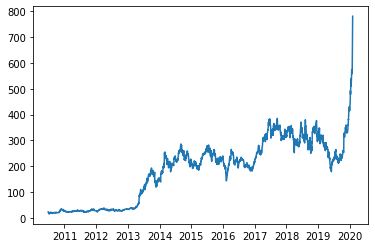

In [ ]:
plt.plot(df1[['Close']])

In [ ]:
import pandas_ta
df1.ta.ema(close='Close', length=10, append=True)
df1= df1.iloc[10:]
print(df1)

                 Close      EMA_10
Date                              
2010-07-14   19.840000   19.221454
2010-07-15   19.889999   19.343008
2010-07-16   20.639999   19.578824
2010-07-19   21.910000   20.002675
2010-07-20   20.299999   20.056734
...                ...         ...
2020-01-28  566.900024  543.363842
2020-01-29  580.989990  550.204960
2020-01-30  640.809998  566.678603
2020-01-31  650.570007  581.931586
2020-02-03  780.000000  617.944025

[2406 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/pandas_ta/core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


In [ ]:
# plt.plot(df1[['Close']],df1[['EMA_10']])

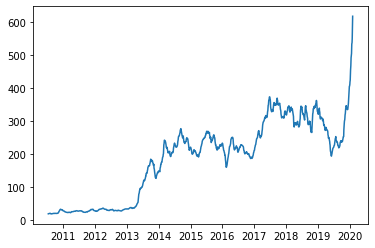

In [ ]:
plt.plot(df1[['EMA_10']])


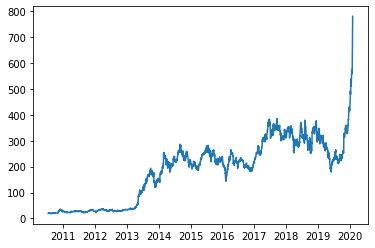

In [ ]:
plt.plot(df1[['Close']])
# plt.plot(df1[['Adj Close']]);

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df1[['Close']], df1[['EMA_10']], test_size=.2)

Text(0, 0.5, 'EMA_10 of Closing values')

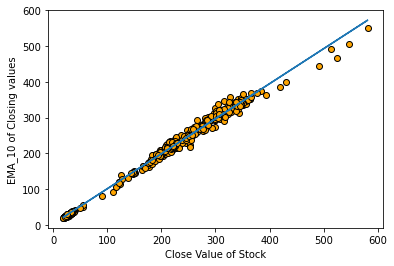

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
#print(y_pred)
plt.plot(X1_test,y1_pred)
plt.scatter(X1_test,y1_test,color="orange",edgecolors="black")
plt.xlabel("Close Value of Stock")
plt.ylabel("EMA_10 of Closing values")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y1_test, y1_pred))
print("Coefficient of Determination:", r2_score(y1_test, y1_pred))
print("Mean Squared Error:", mean_squared_error(y1_test, y1_pred))


Model Coefficients: [[0.98098844]]
Mean Absolute Error: 6.1342866995017475
Coefficient of Determination: 0.9941079767161183
Mean Squared Error: 83.34613110833597


# Model 2

In [ ]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df0 = df[['Adj Close']]
print(df0)

             Adj Close
Date                  
2010-06-29   23.889999
2010-06-30   23.830000
2010-07-01   21.959999
2010-07-02   19.200001
2010-07-06   16.110001
...                ...
2020-01-28  566.900024
2020-01-29  580.989990
2020-01-30  640.809998
2020-01-31  650.570007
2020-02-03  780.000000

[2416 rows x 1 columns]


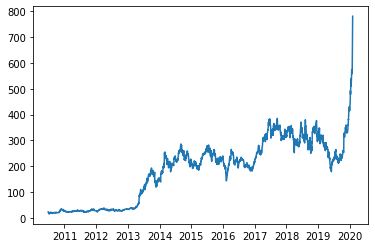

In [ ]:
plt.plot(df0[['Adj Close']])

In [ ]:
pip install pandas_ta


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_ta
df0.ta.ema(close='Adj Close', length=10, append=True)
df0= df0.iloc[10:]
print(df0.head())

            Adj Close     EMA_10
Date                            
2010-07-14  19.840000  19.221454
2010-07-15  19.889999  19.343008
2010-07-16  20.639999  19.578824
2010-07-19  21.910000  20.002675
2010-07-20  20.299999  20.056734


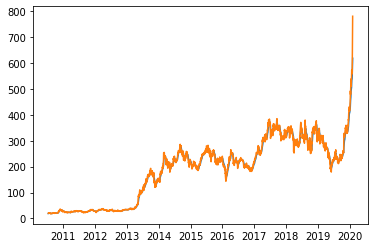

In [ ]:
plt.plot(df0[['EMA_10']])
plt.plot(df0[['Adj Close']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df0[['Adj Close']], df0[['EMA_10']], test_size=.2)

In [ ]:
print(X_test.describe())
print(X_train.describe())

        Adj Close
count  482.000000
mean   189.591453
std    116.344771
min     17.900000
25%     35.034999
50%    215.449997
75%    265.589996
max    558.020020
         Adj Close
count  1924.000000
mean    186.474688
std     119.544165
min      17.600000
25%      34.425000
50%     212.960007
75%     267.677513
max     780.000000


Text(0, 0.5, 'EMA_10 of Adj Close')

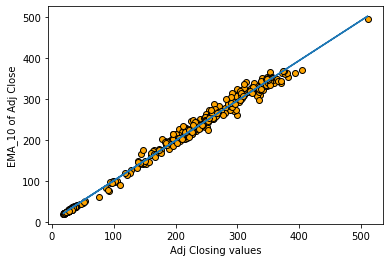

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print(y_pred)
plt.plot(X_test,y_pred)
plt.scatter(X_test,y_test,color="orange",edgecolors="black")
plt.xlabel("Adj Closing values")
plt.ylabel("EMA_10 of Adj Close")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))



Model Coefficients: [[0.98021177]]
Mean Absolute Error: 6.120271524523106
Coefficient of Determination: 0.994152612729081
Mean Squared Error: 78.46584345007726


# Model 3

In [ ]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df2 = df[['Open']]
print(df2)
# df2.set_index()


                  Open
Date                  
2010-06-29   19.000000
2010-06-30   25.790001
2010-07-01   25.000000
2010-07-02   23.000000
2010-07-06   20.000000
...                ...
2020-01-28  568.489990
2020-01-29  575.690002
2020-01-30  632.419983
2020-01-31  640.000000
2020-02-03  673.690002

[2416 rows x 1 columns]


In [ ]:
plt.plot(df[['Open']])

In [ ]:
import pandas_ta
df2.ta.ema(close='Open', length=10, append=True)
df2= df2.iloc[10:]

print(df2.head())

In [ ]:
plt.plot(df2[['Open']],color="red")
plt.plot(df2[['EMA_10']])
# plt.scatter(df2[['EMA_10']],df2[['Open']])

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2[['Open']], df2[['EMA_10']], test_size=.2)

In [ ]:
print(X2_train.describe())
print(X2_test.describe())

Text(0, 0.5, 'EMA_10 of Openening values of the stock')

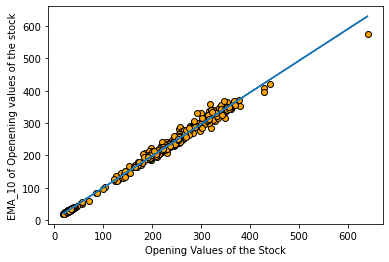

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)
#print(y_pred)
plt.plot(X2_test,y2_pred)
plt.scatter(X2_test,y2_test,color="orange",edgecolors="black")
plt.xlabel("Opening Values of the Stock")
plt.ylabel("EMA_10 of Openening values of the stock")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y2_test, y2_pred))
print("Coefficient of Determination:", r2_score(y2_test, y2_pred))
print("Mean Squared Error:", mean_squared_error(y2_test, y2_pred))


Model Coefficients: [[0.98168366]]
Mean Absolute Error: 6.305899766014425
Coefficient of Determination: 0.9935294892530083
Mean Squared Error: 86.67421958959478
